# § NumPy Basics: Arrays and Vectorized Computation

## § 4.1 The NumPy ndarray : A Multidimensional Array Object 
* Creating ndarrays 88
* Data Types for ndarrays 90
* Arithmetic with NumPy Arrays 93
* Basic Indexing and Slicing 94
* Boolean Indexing 99
* Fancy Indexing 102
* Transposing Arrays and Swapping Axes 103

## § 4.2 Pseudorandom Number Generation
## § 4.3 Universal Functions: Fast Element-Wise Array Functions
* Expressing Conditional Logic as Array Operations 109
* Mathematical and Statistical Methods 111
* Methods for Boolean Arrays 113
* Sorting 113
* Unique and Other Set Logic 114

## § 4.4 Array-Oriented Programming with Arrays

## § 4.5 File Input and Output with Arrays

## § 4.6 Linear Algebra

## § 4.7 Example: Random Walks
* Simulating Many Random Walks at Once 121

In [1]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [4]:
import numpy as np

my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

1000000

#### NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.

In [6]:
%timeit my_arr2 = my_arr * 2
%timeit my_list2 = [x * 2 for x in my_list]

1.37 ms ± 97.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
66.5 ms ± 546 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
import numpy as np
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [8]:
data * 10
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In [10]:
data.shape, data.dtype

((2, 3), dtype('float64'))

### § 4.1.1 Creating ndarrays

In [11]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [12]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [13]:
arr2.ndim
arr2.shape

(2, 4)

In [14]:
arr1.dtype
arr2.dtype

dtype('int32')

In [15]:
np.zeros(10)
np.zeros((3, 6))
np.empty((2, 3, 2))

array([[[1.3738e-311, 2.8162e-322],
        [0.0000e+000, 0.0000e+000],
        [0.0000e+000, 1.0408e-047]],

       [[4.2671e-090, 2.6199e+180],
        [8.4143e+164, 1.4404e+160],
        [6.4822e+170, 4.9343e+257]]])

In [16]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

###  § 4.1.2 Data Types for ndarrays

In [18]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype, arr2.dtype

(dtype('float64'), dtype('int32'))

In [19]:
arr = np.array([1, 2, 3, 4, 5])
float_arr = arr.astype(np.float64)
arr.dtype, float_arr, float_arr.dtype

(dtype('int32'), array([1., 2., 3., 4., 5.]), dtype('float64'))

In [21]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr, arr.astype(np.int32)

(array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1]), array([ 3, -1, -2,  0, 12, 10]))

In [22]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [23]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [24]:
zeros_uint32 = np.zeros(8, dtype="u4")  # u4 : unsigned 32-bit integer types
zeros_uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

###  § 4.1.3 Arithmetic with NumPy Arrays

In [25]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr, arr * arr, arr - arr

(array([[1., 2., 3.],
        [4., 5., 6.]]),
 array([[ 1.,  4.,  9.],
        [16., 25., 36.]]),
 array([[0., 0., 0.],
        [0., 0., 0.]]))

In [26]:
1 / arr, arr ** 2

(array([[1.    , 0.5   , 0.3333],
        [0.25  , 0.2   , 0.1667]]),
 array([[ 1.,  4.,  9.],
        [16., 25., 36.]]))

In [27]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2, arr2 > arr

(array([[ 0.,  4.,  1.],
        [ 7.,  2., 12.]]),
 array([[False,  True, False],
        [ True, False,  True]]))

###  § 4.1.4 Basic Indexing and Slicing

In [28]:
arr = np.arange(10)
arr, arr[5], arr[5:8]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 5, array([5, 6, 7]))

In [29]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [30]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [31]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [32]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [33]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [34]:
arr2d[0][2]
arr2d[0, 2]

3

In [35]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [36]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [38]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [39]:
arr3d[1, 0]

array([7, 8, 9])

In [40]:
x = arr3d[1]
x, x[0]

(array([[ 7,  8,  9],
        [10, 11, 12]]),
 array([7, 8, 9]))

###  Indexing with slices

In [50]:
arr, arr[1:6]

(array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9]), array([ 1,  2,  3,  4, 64]))

In [51]:
arr2d, arr2d[:2]

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[1, 2, 3],
        [4, 5, 6]]))

In [52]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [53]:
lower_dim_slice = arr2d[1, :2]

In [55]:
lower_dim_slice, lower_dim_slice.shape

(array([4, 5]), (2,))

In [56]:
arr2d[:2, 2]

array([3, 6])

In [57]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [58]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### § 4.1.5 Boolean Indexing

In [59]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2],
                 [-12, -4], [3, 4]])
names
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [60]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [61]:
data[names == "Bob"]

array([[4, 7],
       [0, 0]])

In [62]:
data[names == "Bob", 1:]
data[names == "Bob", 1]

array([7, 0])

In [64]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [65]:
~(names == "Bob")

array([False,  True,  True, False,  True,  True,  True])

In [66]:
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [67]:
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [68]:
mask = (names == "Bob") | (names == "Will")
mask, data[mask]

(array([ True, False,  True,  True,  True, False, False]),
 array([[ 4,  7],
        [-5,  6],
        [ 0,  0],
        [ 1,  2]]))

In [69]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

In [70]:
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

### § 4.1.6 Fancy Indexing

In [71]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [72]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [73]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [74]:
arr = np.arange(32).reshape((8, 4))
arr, arr[[1, 5, 7, 2], [0, 3, 1, 2]]

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]]),
 array([ 4, 23, 29, 10]))

In [75]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## 新加的內容 (開始)

In [76]:
print(arr[[1, 5, 7, 2], [0, 3, 1, 2]])
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
arr

[ 4 23 29 10]


array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

## 新加的內容 (結束)

### § 4.1.7 Transposing Arrays and Swapping Axes

In [78]:
arr = np.arange(15).reshape((3, 5))
arr, arr.T

(array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]]),
 array([[ 0,  5, 10],
        [ 1,  6, 11],
        [ 2,  7, 12],
        [ 3,  8, 13],
        [ 4,  9, 14]]))

In [79]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
arr, np.dot(arr.T, arr)

(array([[ 0,  1,  0],
        [ 1,  2, -2],
        [ 6,  3,  2],
        [-1,  0, -1],
        [ 1,  0,  1]]),
 array([[39, 20, 12],
        [20, 14,  2],
        [12,  2, 10]]))

In [80]:
arr.T @ arr  # The @ infix operator is another way to do matrix multiplication

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [81]:
arr
arr.swapaxes(0, 1) # swapaxes, which takes a pair of axis numbers and switches the indicated axes to rearrange the data

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

## § 4.2 Pseudorandom Number Generation

#### 比較使用 random 套件與 numpy 的執行速度差異

In [87]:
samples = np.random.standard_normal(size=(4, 4))
samples

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [ 0.275 ,  0.2289,  1.3529,  0.8864]])

In [88]:
from random import normalvariate
N = 1_000_000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.standard_normal(N)

719 ms ± 28.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
23.7 ms ± 477 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [89]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))

In [90]:
type(rng)

numpy.random._generator.Generator

## § 4.3 Universal Functions: Fast Element-Wise Array Functions

In [91]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
np.sqrt(arr)

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [93]:
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

In [97]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)
x, y

(array([-1.2287,  0.2576,  0.3129, -0.1308,  1.27  , -0.093 , -0.0662,
        -1.1082]),
 array([0.136 , 1.3471, 0.0611, 0.0709, 0.4337, 0.2775, 0.5303, 0.5367]))

In [98]:
np.maximum(x, y)

array([0.136 , 1.3471, 0.3129, 0.0709, 1.27  , 0.2775, 0.5303, 0.5367])

In [112]:
arr = rng.standard_normal(7) * 5
arr

array([-6.839 ,  3.2445,  1.8053, -9.7643, 11.737 ,  4.8425, -3.7969])

In [113]:
remainder, whole_part = np.modf(arr)
remainder, whole_part

(array([-0.839 ,  0.2445,  0.8053, -0.7643,  0.737 ,  0.8425, -0.7969]),
 array([-6.,  3.,  1., -9., 11.,  4., -3.]))

## 新加的內容 (開始)

In [114]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))

In [115]:
arr

array([-6.839 ,  3.2445,  1.8053, -9.7643, 11.737 ,  4.8425, -3.7969])

In [116]:
out = np.zeros_like(arr)
np.add(arr, 1), out

(array([-5.839 ,  4.2445,  2.8053, -8.7643, 12.737 ,  5.8425, -2.7969]),
 array([0., 0., 0., 0., 0., 0., 0.]))

#### Ufuncs accept an optional out argument that allows them to assign their results into an existing array rather than create a new one

In [117]:
np.add(arr, 1, out=out)
out

array([-5.839 ,  4.2445,  2.8053, -8.7643, 12.737 ,  5.8425, -2.7969])

## 新加的內容 (結束)

## § 4.4 Array-Oriented Programming with Arrays

In [120]:
points = np.arange(-5, 5, 0.01) # 100 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [121]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

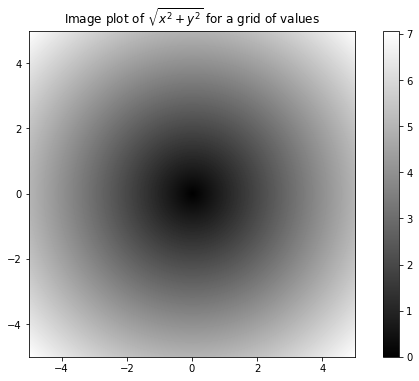

In [122]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [123]:
plt.draw()

<Figure size 720x432 with 0 Axes>

In [124]:
plt.close("all")

### § 4.4.1 Expressing Conditional Logic as Array Operations

In [125]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [126]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [127]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [128]:
arr = rng.standard_normal((4, 4))
arr, arr > 0, np.where(arr > 0, 2, -2)

(array([[-1.3678,  0.6489,  0.3611, -1.9529],
        [ 2.3474,  0.9685, -0.7594,  0.9022],
        [-0.467 , -0.0607,  0.7888, -1.2567],
        [ 0.5759,  1.399 ,  1.3223, -0.2997]]),
 array([[False,  True,  True, False],
        [ True,  True, False,  True],
        [False, False,  True, False],
        [ True,  True,  True, False]]),
 array([[-2,  2,  2, -2],
        [ 2,  2, -2,  2],
        [-2, -2,  2, -2],
        [ 2,  2,  2, -2]]))

In [129]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-1.3678,  2.    ,  2.    , -1.9529],
       [ 2.    ,  2.    , -0.7594,  2.    ],
       [-0.467 , -0.0607,  2.    , -1.2567],
       [ 2.    ,  2.    ,  2.    , -0.2997]])

### § 4.4.2 Mathematical and Statistical Methods

In [130]:
arr = rng.standard_normal((5, 4))
arr, arr.mean(), np.mean(arr), arr.sum()

(array([[ 0.9029, -1.6216, -0.1582,  0.4495],
        [-1.3436, -0.0817,  1.7247,  2.6182],
        [ 0.7774,  0.8286, -0.959 , -1.2094],
        [-1.4123,  0.5415,  0.7519, -0.6588],
        [-1.2287,  0.2576,  0.3129, -0.1308]]),
 0.018063390847970272,
 0.018063390847970272,
 0.36126781695940546)

In [132]:
arr.mean(axis=1), arr.sum(axis=0)

(array([-0.1068,  0.7294, -0.1406, -0.1944, -0.1973]),
 array([-2.3043, -0.0755,  1.6724,  1.0687]))

In [134]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [135]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [137]:
arr.cumsum(axis=0), arr.cumsum(axis=1)

(array([[ 0,  1,  2],
        [ 3,  5,  7],
        [ 9, 12, 15]], dtype=int32),
 array([[ 0,  1,  3],
        [ 3,  7, 12],
        [ 6, 13, 21]], dtype=int32))

### § 4.4.3 Methods for Boolean Arrays

In [148]:
arr = rng.standard_normal(100)
(arr > 0).sum() # Number of positive values

49

In [149]:
(arr <= 0).sum() # Number of non-positive values

51

In [150]:
#! ipython id=2509d496877b4d11b4fdabb5203d828a
bools = np.array([False, False, True, False])
bools.any(), bools.all()

(True, False)

In [151]:
#! ipython id=d2abca3990204292845fa1773445ed1e
arr = rng.standard_normal(6)
arr

array([ 1.3524, -0.364 ,  0.2357, -1.3923,  1.4347, -1.0695])

In [152]:
arr.sort()
arr

array([-1.3923, -1.0695, -0.364 ,  0.2357,  1.3524,  1.4347])

In [153]:
arr = rng.standard_normal((5, 3))
arr

array([[ 0.9105,  1.1137,  1.2323],
       [ 1.8141, -1.1707,  0.402 ],
       [ 0.138 ,  0.4199,  1.0983],
       [ 0.1094, -0.8169, -0.0973],
       [ 1.5392, -1.179 ,  0.0797]])

In [154]:
arr.sort(axis=0)
arr

array([[ 0.1094, -1.179 , -0.0973],
       [ 0.138 , -1.1707,  0.0797],
       [ 0.9105, -0.8169,  0.402 ],
       [ 1.5392,  0.4199,  1.0983],
       [ 1.8141,  1.1137,  1.2323]])

In [155]:
arr.sort(axis=1)
arr

array([[-1.179 , -0.0973,  0.1094],
       [-1.1707,  0.0797,  0.138 ],
       [-0.8169,  0.402 ,  0.9105],
       [ 0.4199,  1.0983,  1.5392],
       [ 1.1137,  1.2323,  1.8141]])

In [156]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

### § 4.4.5 Unique and Other Set Logic

In [157]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [159]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [160]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

##  § 4.5 File Input and Output with Arrays

In [175]:
arr = np.arange(10)
np.save("some_array", arr)

In [176]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [177]:
np.savez("array_archive.npz", a=arr, b=arr)

In [178]:
arch = np.load("array_archive.npz")
arch["b"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [179]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

In [180]:
arch.close()

### In linux : !rm
### In windows : !del

In [181]:
!del some_array.npy
!del array_archive.npz
!del arrays_compressed.npz


## § 4.6 Linear Algebra

In [182]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x, y

(array([[1., 2., 3.],
        [4., 5., 6.]]),
 array([[ 6., 23.],
        [-1.,  7.],
        [ 8.,  9.]]))

In [183]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [184]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [185]:
x @ np.ones(3)

array([ 6., 15.])

In [187]:
from numpy.linalg import inv, qr
X = rng.standard_normal((5, 5))
mat = X.T @ X
inv(mat)

array([[ 6.0977, -3.3014, -2.7766,  3.0629,  2.3962],
       [-3.3014,  4.4135,  3.4946, -3.4949,  0.1939],
       [-2.7766,  3.4946,  3.1137, -3.1935,  0.2393],
       [ 3.0629, -3.4949, -3.1935,  3.4868, -0.2163],
       [ 2.3962,  0.1939,  0.2393, -0.2163,  2.2948]])

In [188]:
mat @ inv(mat)

array([[ 1.,  0.,  0.,  0., -0.],
       [ 0.,  1., -0., -0., -0.],
       [-0., -0.,  1.,  0.,  0.],
       [-0.,  0.,  0.,  1.,  0.],
       [ 0., -0., -0., -0.,  1.]])

## § 4.7 Example: Random Walks

In [189]:
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [190]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

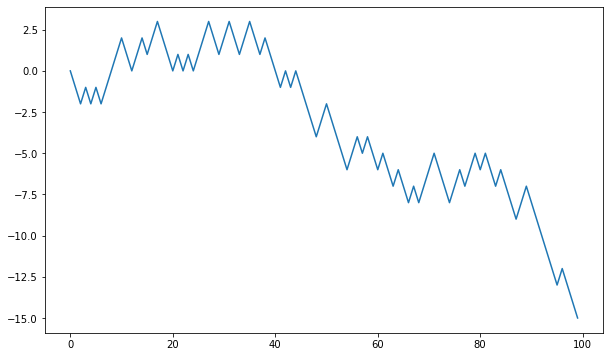

In [191]:
plt.plot(walk[:100])

In [192]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)  # fresh random generator
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [194]:
walk.min(), walk.max()

(-8, 50)

In [195]:
(np.abs(walk) >= 10).argmax()

155

###  § 4.7.1 Simulating Many Random Walks at Once

In [196]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]], dtype=int32)

In [197]:
walks.max()
walks.min()

-120

In [198]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30
hits30.sum() # Number that hit 30 or -30

3395

In [199]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([201, 491, 283, ..., 219, 259, 541], dtype=int64)

In [200]:
crossing_times.mean()

500.5699558173785

In [202]:
# use a different random generator method, 
# like standard_normal to generate normally distributed steps with some mean and standard deviation
draws = 0.25 * rng.standard_normal((nwalks, nsteps))